## DSCI100 Project - Heart Disease

* Introduction

* Preliminary Exploratory Data Analysis
- Demonstrate that the dataset can be read from the web into R 
- Clean and wrangle your data into a tidy format
- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [1]:
# Load Packages
library(rvest)
library(tidyverse)
library(repr)
library(tidymodels)
library(stringr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()         masks stats::filter()
✖ readr::guess_encoding() masks rvest::guess_encoding()
✖ dplyr::lag()            masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fi

In [2]:
heart_disease_download <- download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                                        "heart_disease.csv")
heart_disease_original <- read_delim("heart_disease.csv",
                                      col_names = FALSE)

names(heart_disease_original) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
heart_disease_original

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


num,count,percentage
<dbl>,<int>,<dbl>
0,124,54.867257
1,41,18.141593
2,25,11.061947
3,26,11.504425
4,10,4.424779


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



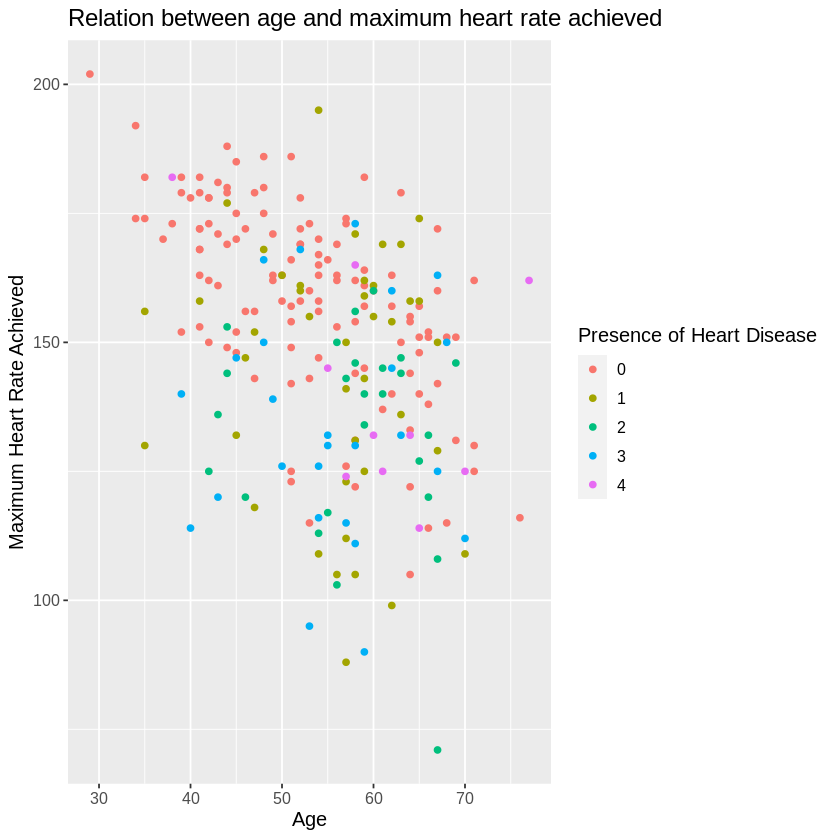

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



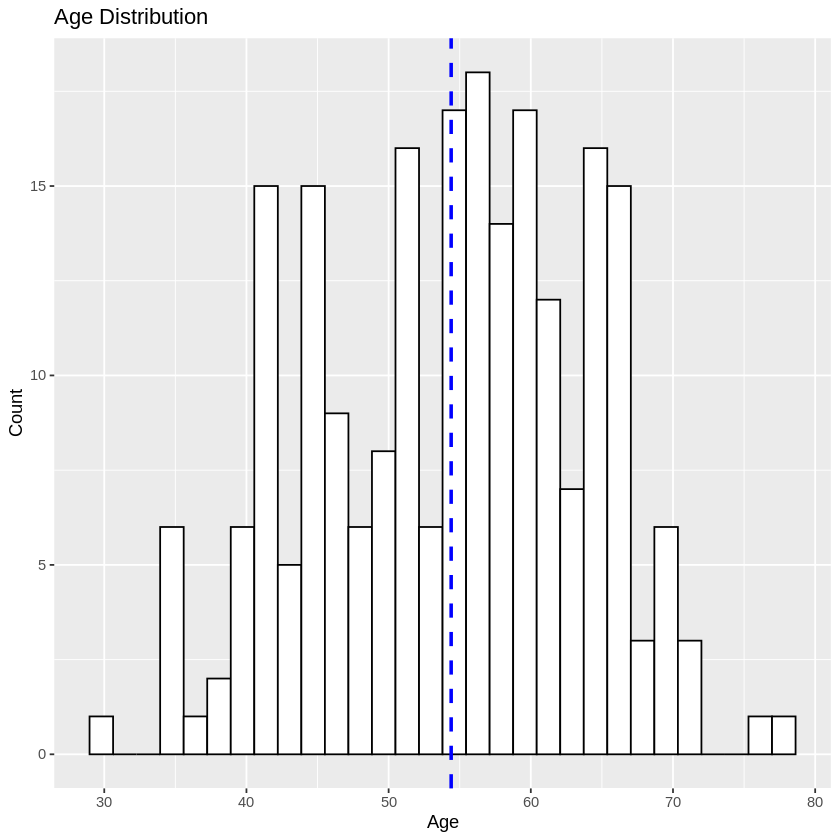

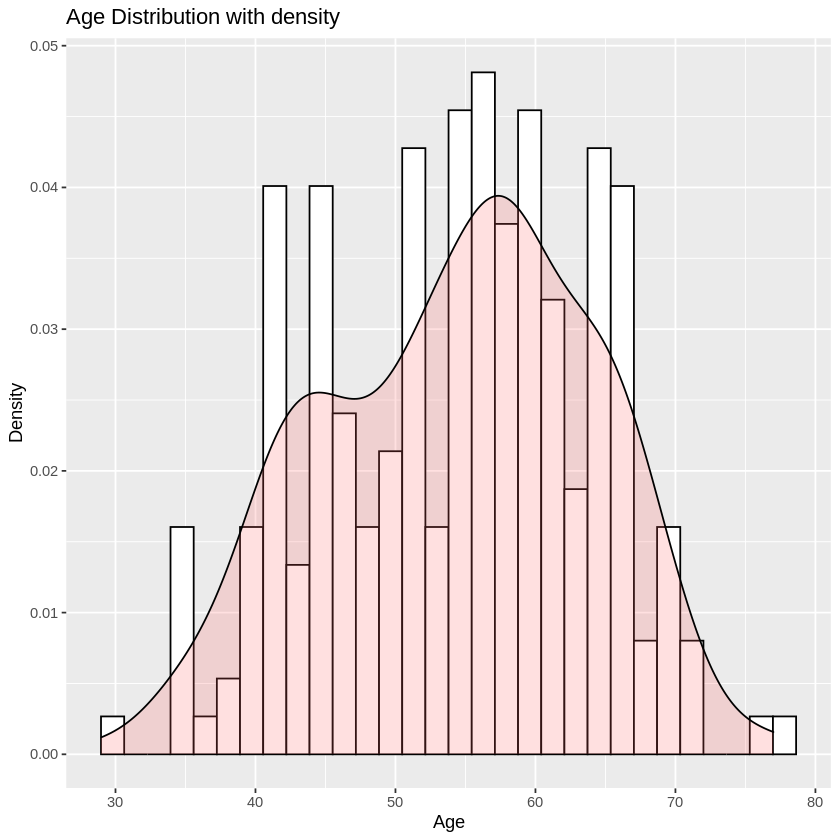

In [35]:
# Set the Seed
set.seed(1)

# Load data
heart_disease_download <- download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                                        "heart_disease.csv")
heart_disease_original <- read_csv("heart_disease.csv", col_names = FALSE)
names(heart_disease_original) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

# Clean and Wrangle Data into a Tidy Format
# Since we are using a processed dataset the data is already in tidy format
        
# Training and Testing Data Set Split
heart_disease_split <- initial_split(heart_disease_original, prop = 0.75, strata = num)
heart_disease_training <- training(heart_disease_split)
heart_disease_testing <- testing(heart_disease_split)

# Exploratory Data Analysis (Table)
num_obs <- nrow(heart_disease_training)
heart_disease_exp_table <- heart_disease_training |>
                           group_by(num) |>
                           summarize(count = n(), percentage = n() / num_obs * 100)
heart_disease_exp_table

# The table shows the varying levels of heart disease from 0 (which indicates abscence) to 4 (which indicates prescence), and 
# also shows their respective counts

# Exploratory Data Analysis (Visualization)
heart_disease_exp_plot1 <- heart_disease_training |>
                              ggplot(aes(x = age, y = thalach, colour = as_factor(num))) +
                              geom_point() +
                              ggtitle("Relation between age and maximum heart rate achieved")+
                              labs(x = "Age", y = "Maximum Heart Rate Achieved", colour = "Presence of Heart Disease")+ 
                              theme(text = element_text(size = 12))
heart_disease_exp_plot1

# This plot shows the relation between Age and the maximum heart rate and each point is colored by the prescence of 
# heart disease

heart_disease_exp_plot2 <- heart_disease_training |>
                            ggplot(aes(x = age, color=sex))+
                            geom_histogram(color="black", fill="white")+
                            ggtitle("Age Distribution")+
                            labs(x = "Age", y = "Count", fill="", color = "")+
                            geom_vline(aes(xintercept=mean(age)),
                            color="blue", linetype="dashed", size=1)+
                            theme(legend.position="top")
heart_disease_exp_plot2

#This plot shows the distribution of age with the blue dashed line indicating the mean age
heart_disease_exp_plot2d <- ggplot(heart_disease_training, aes(x=age)) + 
                             geom_histogram(aes(y=..density..), colour="black", fill="white")+
                             geom_density(alpha=.2, fill="#FF6666") +
                             ggtitle("Age Distribution with density")+
                             labs(x = "Age", y = "Density", fill="", color = "")
                                

heart_disease_exp_plot2d

# This plot shows the distribution of age with a density curve



* Methods

* Expected Outcomes and Significance